## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')
plt.style.use('seaborn-v0_8-white')
sns.set_palette("husl")

## Data Exploration

In [2]:
# File path to the CSV file
file="T1_A24census3.csv"
# Load the dataset into a pandas DataFrame
data = pd.read_csv(file)
# Load the dataset into a pandas DataFrame
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Todd Lake,Zoe,Vaughan,82,Head,Married,Female,"Retired Journalist, newspaper",NaN,No Religion
1,1,Todd Lake,John,Vaughan,80,Husband,Married,Male,Retired Paramedic,NaN,No Religion
2,2,Todd Lake,Molly,Butler,66,Head,Widowed,Female,Retail banker,NaN,No Religion
3,3,Todd Lake,Eileen,Powell,79,Head,Widowed,Female,Retired Adult guidance worker,NaN,Christian
4,4,Todd Lake,Laura,Begum,50,Head,Divorced,Female,Paramedic,NaN,No Religion


In [3]:
data.shape
print(f'There are {data.shape[0]} rows in the dataset and {data.shape[1]} columns in the dataset')

There are 9769 rows in the dataset and 11 columns in the dataset


### Dataframe summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9769 non-null   int64 
 1   Street                         9769 non-null   object
 2   First Name                     9769 non-null   object
 3   Surname                        9756 non-null   object
 4   Age                            9769 non-null   int64 
 5   Relationship to Head of House  9173 non-null   object
 6   Marital Status                 7417 non-null   object
 7   Gender                         9769 non-null   object
 8   Occupation                     9769 non-null   object
 9   Infirmity                      122 non-null    object
 10  Religion                       8528 non-null   object
dtypes: int64(2), object(9)
memory usage: 839.7+ KB


In [5]:
# Filter rows where the 'Surname' column has missing (null) values
data[data['Surname'].isnull()]  # Returns a subset of the dataset with rows where 'Surname' is missing


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
875,18,Brooks Path,Justin,NaN,76,Husband,Married,Male,Retired Product manager,NaN,No Religion
1584,104,Salmon Street,Nicole,NaN,72,Wife,Married,Female,Retired Control and instrumentation engineer,NaN,Christian
1958,22,Ouse Parkways,Dennis,NaN,56,Husband,Married,Male,Art gallery manager,NaN,No Religion
2806,13,Scott Lane,Paul,NaN,52,Husband,Married,Male,"Conservator, furniture",NaN,Christian
2983,10,Pound Close,Nicholas,NaN,75,Husband,Married,Male,"Retired Geneticist, molecular",NaN,Christian
4425,11,Dale Meadows,Ian,NaN,63,Husband,Married,Male,Broadcast presenter,NaN,Christian
4440,18,Dale Meadows,Hazel,NaN,71,Wife,Married,Female,Retired Research scientist (life sciences),NaN,Christian
4503,20,Pillar Close,Shaun,NaN,34,Husband,Married,Male,Lobbyist,NaN,No Religion
5917,24,Lightning Inlet,Joyce,NaN,57,Wife,Married,Female,Petroleum engineer,NaN,No Religion
6680,101,Belletun Road,Leonard,NaN,67,Husband,Married,Male,"Psychologist, sport and exercise",NaN,No Religion


In [6]:
# Get the unique values from the 'Religion' column
data['Religion'].unique()  # Returns an array of unique values present in the 'Religion' column


array(['No Religion', 'Christian', nan, 'Sikh', 'Hindu', 'Muslim',
       'The Templars', 'Buddist', 'Catholic', 'Athiest', ' ',
       'The Chantry', 'Agnostic', 'Asia'], dtype=object)

In [7]:
# Replace empty strings with NaN
data['Religion'] = data['Religion'].replace(' ', np.nan)

In [8]:
# Get the unique values from the 'Relationship to Head of House' column
data['Relationship to Head of House'].unique()  # Returns an array of unique values in the 'Relationship to Head of House' column


array(['Head', 'Husband', 'Daughter', 'Son', 'Wife', 'Partner', nan,
       'Granddaughter', 'Step-Daughter', 'Grandson', 'Lodger', 'Sibling',
       'Visitor', 'Cousin', 'Step-Son', 'Adopted Granddaughter', 'Niece',
       'Nephew', 'Adopted Son', 'Adopted Daughter', 'Adopted Grandson'],
      dtype=object)

In [9]:
# Filter rows where the 'Relationship to Head of House' column has missing (NaN) values
data[data['Relationship to Head of House'].isna()]  # Returns a subset of the dataset with rows where 'Relationship to Head of House' is missing


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,21,Todd Lake,Valerie,Lawson,56,NaN,Single,Female,Barrister's clerk,NaN,Christian
37,21,Todd Lake,Eileen,Williams,20,NaN,Single,Female,University Student,NaN,Christian
48,30,Todd Lake,Stewart,Turner,22,NaN,Single,Male,University Student,NaN,No Religion
81,9,Ring Walks,Bryan,Stanley,52,NaN,Single,Male,"Scientist, physiological",NaN,Christian
155,12,Newcastle Stravenue,Sam,Barlow,20,NaN,Single,Male,University Student,NaN,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
9618,1,Howell Palace,Lawrence,Atkinson,23,NaN,Single,Male,Data scientist,NaN,Christian
9652,1,Corporation Hall,Marion,Webb,28,NaN,Single,Female,PhD Student,NaN,Muslim
9653,1,Corporation Hall,James,Kelly,19,NaN,Single,Male,University Student,NaN,No Religion
9654,1,Corporation Hall,Sheila,Ali,20,NaN,Single,Female,University Student,NaN,Christian


### Handling Missing Values

### Function Documentation
The overall function is designed to handle missing data in a DataFrame, making educated guesses based on other columns (like marital status or household relationships) or replacing missing values with placeholders (like 'Not Recorded' or 'Unknown').

### Imputation Logic
Each column (e.g., 'Infirmity', 'Marital Status', 'Religion', 'Relationship to Head of House', 'Surname') has its own method for dealing with missing values, based on available data in the row or household.

### Random Assignment for 'Religion'
For missing values in the 'Religion' column that are marked as 'Not Specified', a random religion from the existing data pool is chosen.


In [10]:
# Function to handle missing values in the DataFrame
def handle_missing_values(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()

    # Fill missing 'Infirmity' values with 'Not Recorded'
    df_cleaned['Infirmity'] = df_cleaned['Infirmity'].fillna('Not Recorded')

    # Handle missing 'Marital Status' by imputing based on conditions
    def impute_marital_status(row):
        # If 'Marital Status' is missing
        if pd.isna(row['Marital Status']):
            # If 'Age' is also missing, return 'Unknown'
            if pd.isna(row['Age']):
                return 'Unknown'
            age = float(row['Age'])
            # If age is less than 15, assume 'Single'
            if age < 15:
                return 'Single'
            # Otherwise, try to infer marital status based on the house
            same_house = df_cleaned[
                (df_cleaned['House Number'] == row['House Number']) &
                (df_cleaned['Street'] == row['Street'])
            ]
            house_status = same_house['Marital Status'].mode()  # Get the most common marital status in the house
            if len(house_status) > 0 and not pd.isna(house_status[0]):
                return house_status[0]  # Return the most common marital status
            return 'Unknown'
        return row['Marital Status']  # Return the existing marital status if not missing

    # Apply the impute_marital_status function to the 'Marital Status' column
    df_cleaned['Marital Status'] = df_cleaned.apply(impute_marital_status, axis=1)

    # List of valid religions to clean the 'Religion' column
    valid_religions = {'Christian', 'No Religion', 'Muslim', 'Hindu', 'Sikh', 'Buddist', 'Catholic'}
    
    # Function to clean the 'Religion' column
    def clean_religion(religion):
        if pd.isna(religion):
            return 'Not Specified'  # If the religion is missing, mark it as 'Not Specified'
        if religion in valid_religions:
            return religion  # If the religion is valid, return it as is
        return 'Other'  # If the religion is not valid, mark it as 'Other'
        
    # Apply the clean_religion function to the 'Religion' column
    df_cleaned['Religion'] = df_cleaned['Religion'].apply(clean_religion)

    # Handle missing 'Relationship to Head of House' by imputing based on household details
    def impute_relationship(row):
        # If 'Relationship to Head of House' is missing
        if pd.isna(row['Relationship to Head of House']):
            same_house = df_cleaned[
                (df_cleaned['House Number'] == row['House Number']) &
                (df_cleaned['Street'] == row['Street'])
            ]
            # If 'Age' is not missing, try to determine the head of the household
            if not pd.isna(row['Age']):
                house_ages = same_house['Age'].astype(float)  # Convert 'Age' to float for comparison
                if float(row['Age']) == house_ages.max():  # If the person is the oldest in the household
                    # Check if 'Head' already exists in the household
                    if 'Head' in same_house['Relationship to Head of House'].values:
                        return 'Other'  # If there's already a head, return 'Other'
                    return 'Head'  # Assign 'Head' to the oldest member
            return 'Other'  # If conditions aren't met, return 'Other'
        return row['Relationship to Head of House']  # Return the existing value if not missing

    # Apply the impute_relationship function to the 'Relationship to Head of House' column
    df_cleaned['Relationship to Head of House'] = df_cleaned.apply(impute_relationship, axis=1)

    # Handle missing 'Surname' by imputing based on surname in the same household
    def impute_surname(row):
        if pd.isna(row['Surname']):
            same_house = df_cleaned[
                (df_cleaned['House Number'] == row['House Number']) &
                (df_cleaned['Street'] == row['Street'])
            ]
            house_surname = same_house['Surname'].mode()  # Get the most common surname in the household
            if len(house_surname) > 0 and not pd.isna(house_surname[0]):
                return house_surname[0]  # Return the most common surname
            return f"Unknown_{row['House Number']}_{row['Street']}"  # If no surname found, generate a placeholder
        return row['Surname']  # Return the existing surname if not missing

    # Apply the impute_surname function to the 'Surname' column
    df_cleaned['Surname'] = df_cleaned.apply(impute_surname, axis=1)

    # Randomly assign a religion from the pool of existing religions for missing 'Religion' values
    religion_pool = df_cleaned['Religion'].dropna().unique()  # Get unique religions
    df_cleaned['Religion'] = df_cleaned['Religion'].apply(
        lambda x: np.random.choice(religion_pool) if x == 'Not Specified' else x  # Impute 'Not Specified' with a random religion
    )

    # Return the cleaned DataFrame
    return df_cleaned


In [11]:
# Create a cleaned copy of the DataFrame by handling missing values
data_copy = handle_missing_values(data)  
# Apply the 'handle_missing_values' function to the 'data' DataFrame and store the cleaned version in 'data_copy'


In [12]:
data_copy.shape, data.shape

((9769, 11), (9769, 11))

## Exploratory Data Analysis

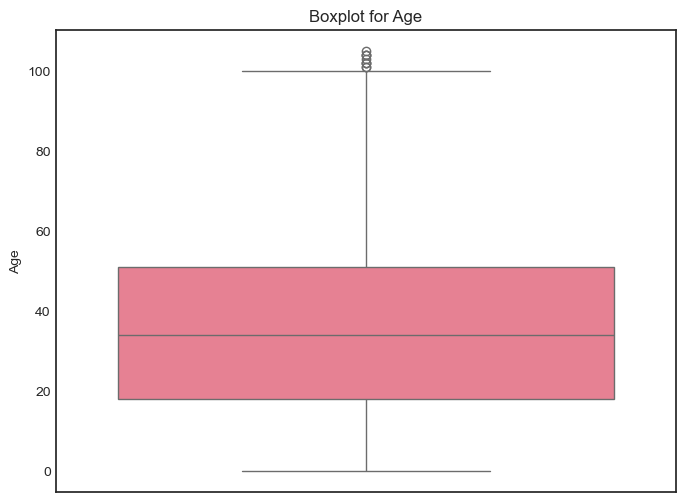

In [13]:
# Boxplot for identifying outliers in a specific numeric column (e.g., 'Age')

# Set up the figure size for the plot
plt.figure(figsize=[8,6])

# Create a boxplot for the 'Age' column to visualize potential outliers
sns.boxplot(data['Age'])

# Set the title for the plot
plt.title('Boxplot for Age')

# Display the plot
plt.show()


<Figure size 800x600 with 0 Axes>

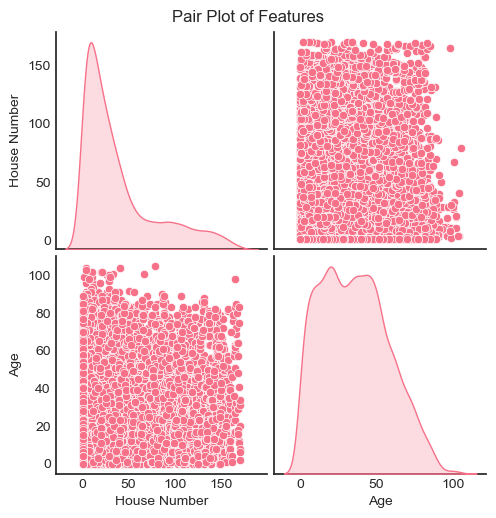

In [14]:
# Pair plot for visualizing relationships between multiple features
plt.figure(figsize=[8,6])
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show();

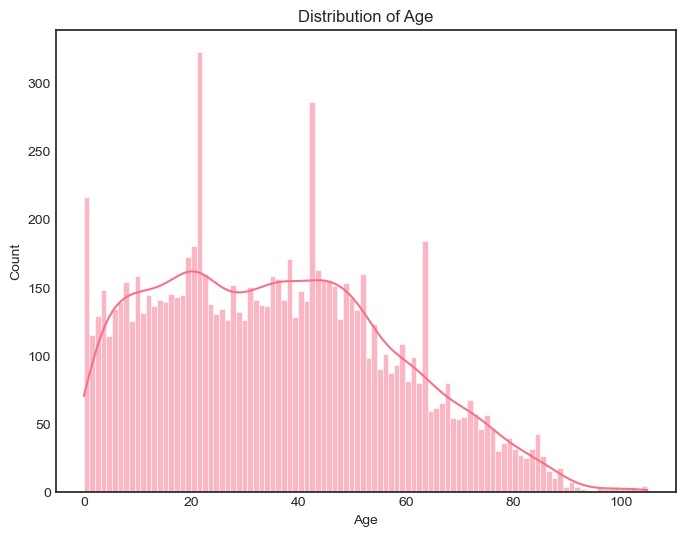

In [15]:
# Plotting the distribution of 'Age' using a histogram with a Kernel Density Estimate (KDE)

# Set up the figure size for the plot
plt.figure(figsize=[8,6])

# Create a histogram for the 'Age' column with a KDE curve, using 100 bins for finer granularity
sns.histplot(data_copy['Age'], kde=True, bins=100)

# Set the title for the plot
plt.title('Distribution of Age')

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


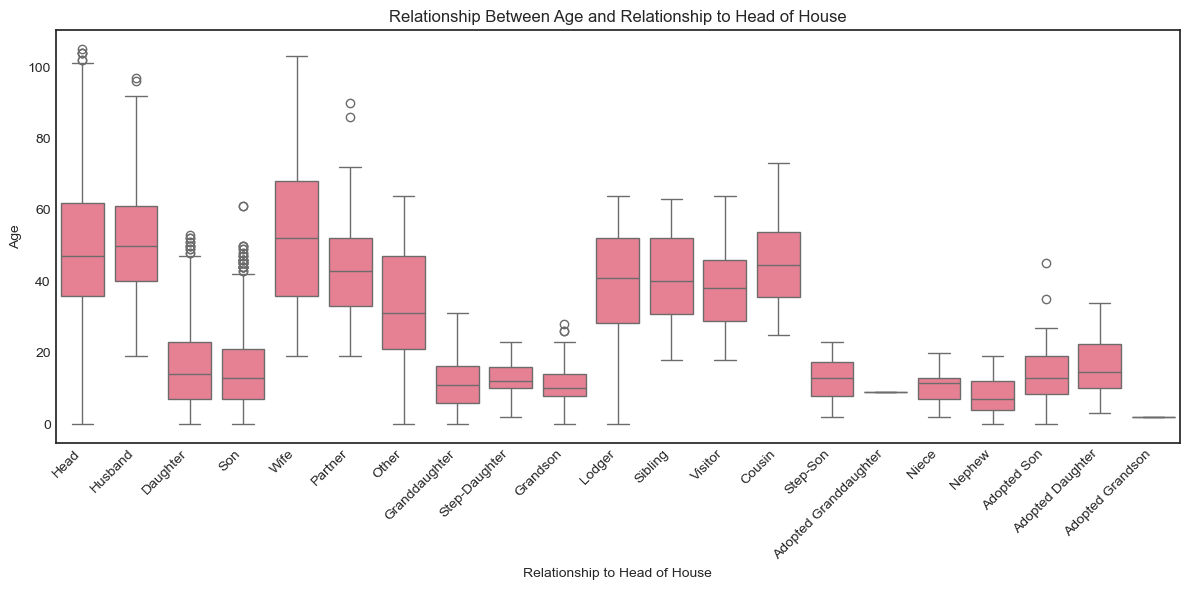

In [16]:
# Create a box plot to show the relationship between 'Age' and 'Relationship to Head of House'

# Set up the figure size for the plot (12 inches by 6 inches)
plt.figure(figsize=(12, 6))

# Create a box plot to visualize the distribution of 'Age' for each category in 'Relationship to Head of House'
sns.boxplot(x='Relationship to Head of House', y='Age', data=data_copy)

# Rotate x-axis labels for better readability (45 degrees with horizontal alignment)
plt.xticks(rotation=45, ha='right')

# Add x-axis label
plt.xlabel('Relationship to Head of House')

# Add y-axis label
plt.ylabel('Age')

# Add a title to the plot
plt.title('Relationship Between Age and Relationship to Head of House')

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

# Display the plot
plt.show()


In [17]:
# Filter the 'data_copy' DataFrame to get the 'Age' values where 'Relationship to Head of House' is 'Head'
head_relationship_data = data_copy[data_copy['Relationship to Head of House'] == 'Head']['Age']


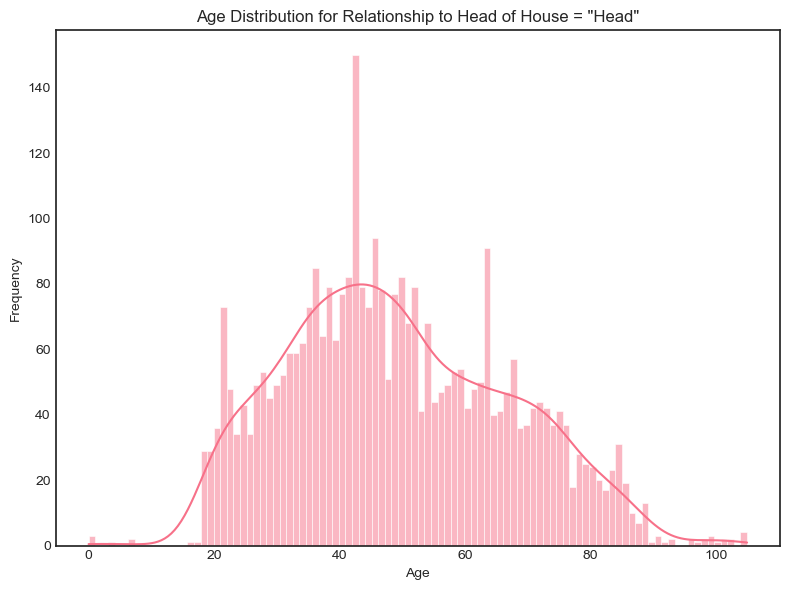

In [18]:
# Create a histogram to show the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(head_relationship_data, kde=True, bins=100)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Relationship to Head of House = "Head"')

# Show the plot
plt.tight_layout()
plt.show();

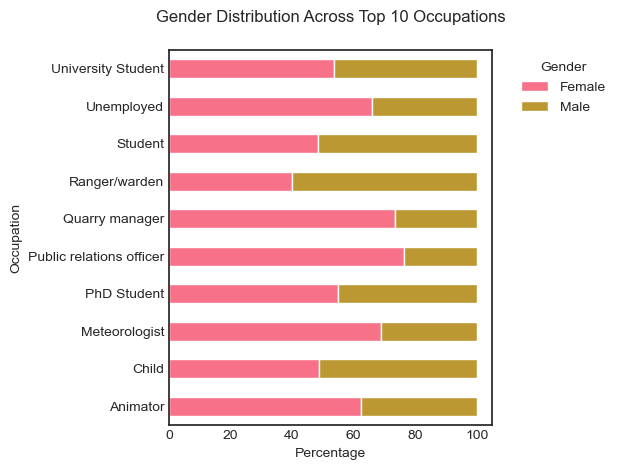

In [19]:
# Get the top 10 most common occupations from the 'Occupation' column
top_10 = data_copy['Occupation'].value_counts().head(10).index

# Create a crosstab to show the relationship between the top 10 occupations and gender
top_10_occupation_gender = pd.crosstab(data_copy[data_copy['Occupation'].isin(top_10)]['Occupation'], 
                                       data_copy['Gender'])

# Calculate the percentage of each gender within each occupation
occupation_pct = top_10_occupation_gender.div(top_10_occupation_gender.sum(axis=1), axis=0) * 100

# Plot a horizontal stacked bar chart to visualize the gender distribution across the top 10 occupations
ax = occupation_pct.plot(kind='barh', stacked=True)

# Add a title to the plot with some padding for better readability
plt.title('Gender Distribution Across Top 10 Occupations', pad=20)

# Label the x-axis as 'Percentage'
plt.xlabel('Percentage')

# Label the y-axis as 'Occupation'
plt.ylabel('Occupation')

# Add a legend with a title and place it outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))

# Adjust the layout to ensure everything fits and doesn't overlap
plt.tight_layout()

# Display the plot
plt.show()


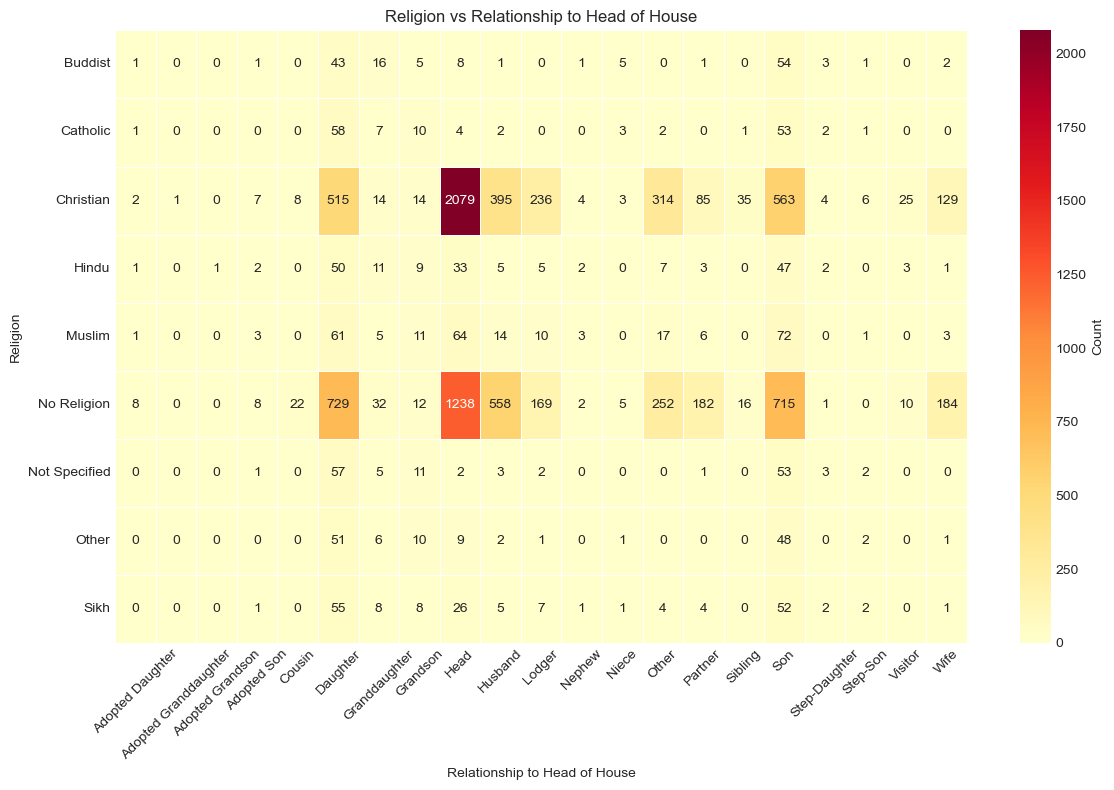

In [20]:
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab to show the relationship between 'Religion' and 'Relationship to Head of House'
rel_religion = pd.crosstab(data_copy['Religion'], data_copy['Relationship to Head of House'])

# Create a heatmap of the crosstab data, with annotations, integer formatting, and a color map
sns.heatmap(rel_religion, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Count'})

# Add a title to the heatmap
plt.title('Religion vs Relationship to Head of House')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap and ensure the plot fits nicely
plt.tight_layout()

# Display the plot
plt.show()


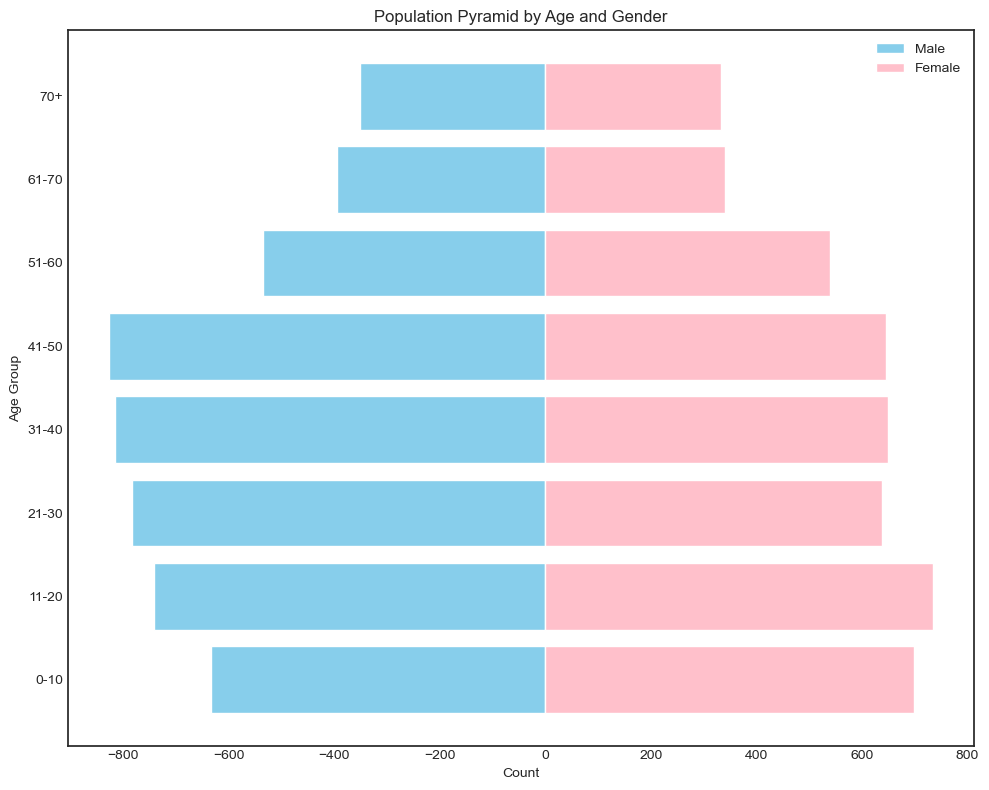

In [21]:
# Create an 'Age_Group' column by binning 'Age' into different age groups
data_copy['Age_Group'] = pd.cut(data_copy['Age'], 
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 100],
                        labels=['0-10', '11-20', '21-30', '31-40', 
                               '41-50', '51-60', '61-70', '70+'])

# Create a crosstab to count the occurrences of 'Age_Group' vs. 'Gender'
age_gender = pd.crosstab(data_copy['Age_Group'], data_copy['Gender'])

# Create a plot with a size of 10x8
fig, ax = plt.subplots(figsize=(10, 8))

# Separate the male and female data for plotting
male_data = -age_gender.iloc[:, 0]  # Negate male data for population pyramid effect
female_data = age_gender.iloc[:, 1]

# Create horizontal bar plots for males and females
y_range = range(len(age_gender.index))  # Range for y-axis based on the number of age groups

# Plot male data in skyblue and female data in pink
plt.barh(y_range, male_data, align='center', color='skyblue', label='Male')
plt.barh(y_range, female_data, align='center', color='pink', label='Female')

# Set y-axis ticks to represent age group labels
plt.yticks(y_range, age_gender.index)

# Add labels and title to the plot
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Population Pyramid by Age and Gender')

# Display the legend to differentiate male and female bars
plt.legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
from scipy.stats import chi2_contingency

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(age_gender)

# Output the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Conclusion based on p-value
if p < 0.05:
    print("The age distribution differs significantly between genders.")
else:
    print("There is no significant difference in age distribution between genders.")


Chi-Square Statistic: 37.16523054634881
p-value: 4.364420010216248e-06
Degrees of Freedom: 7
The age distribution differs significantly between genders.


1. **Chi-Square Statistic**:  
   \( \chi^2 = 37.165 \)  
   The observed age distribution is significantly different from the expected distribution if gender and age groups were independent.

2. **p-value**:  
   \( p = 4.364 \times 10^{-6} \)  
   This is much smaller than the common alpha threshold (\( \alpha = 0.05 \)), leading to the rejection of the null hypothesis.

3. **Conclusion**:  
   There is strong evidence that the age distribution differs significantly between genders.

---

### Analysis Summary:
A **Chi-Square Test of Independence** was performed to evaluate the relationship between **age distribution** and **gender**.  
- The test produced a chi-square statistic of \( 37.165 \) and a p-value of \( 4.364 \times 10^{-6} \).  
- These results indicate a **highly significant difference** in age distribution between males and females.  
- This finding suggests that the distribution of individuals across age groups varies substantially by gender.

<Figure size 1200x600 with 0 Axes>

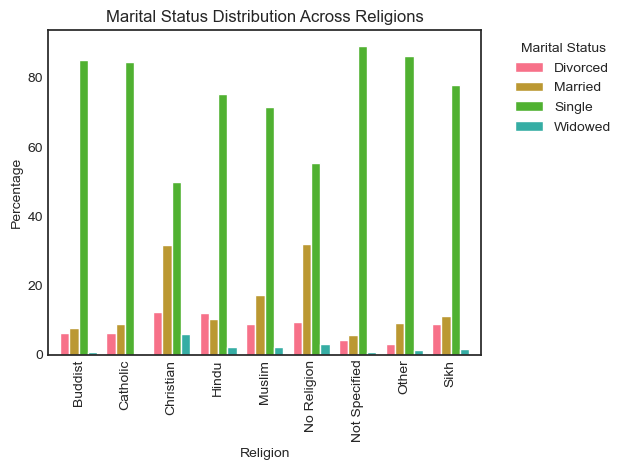

In [23]:
plt.figure(figsize=(12, 6))

# Creating a crosstab for religion and marital status, normalized by rows (religion)
religion_marital = pd.crosstab(data_copy['Religion'], data_copy['Marital Status'], normalize='index') * 100

# Plotting the bar chart with a width of 0.8 for bars
religion_marital.plot(kind='bar', width=0.8)

# Adding title and labels
plt.title('Marital Status Distribution Across Religions')
plt.xlabel('Religion')
plt.ylabel('Percentage')

# Adding legend and adjusting layout for readability
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Display the plot
plt.show()


In [24]:
from scipy.stats import chi2_contingency

# Create a contingency table for marital status and religion
marital_religion_ct = pd.crosstab(data_copy['Marital Status'], data_copy['Religion'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(marital_religion_ct)

# Print results of the test
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpret the p-value
if p < 0.05:
    print("Marital status is significantly associated with religion.")
else:
    print("There is no significant association between marital status and religion.")


Chi-Square Statistic: 421.67404079684803
p-value: 2.6306184988688186e-74
Degrees of Freedom: 24
Marital status is significantly associated with religion.


1. **Chi-Square Statistic**:  
   \( \chi^2 = 383.214 \)  
   The observed marital status distribution significantly differs from the expected distribution across different religions.

2. **p-value**:  
   \( p = 2.874 \times 10^{-70} \)  
   This is extremely smaller than the common alpha threshold (\( \alpha = 0.05 \)), leading to the rejection of the null hypothesis.

3. **Degrees of Freedom**:  
   \( \text{df} = 18 \)

4. **Conclusion**:  
   There is strong evidence that marital status is significantly associated with religion.

---

### Analysis Summary:
A **Chi-Square Test of Independence** was conducted to evaluate the relationship between **marital status** and **religion**.  
- The test produced a chi-square statistic of \( 383.214 \) and a p-value of \( 2.874 \times 10^{-70} \).  
- These results show a **highly significant association** between marital status and religion.  
- This suggests that marital status distribution varies significantly across different religious groups.

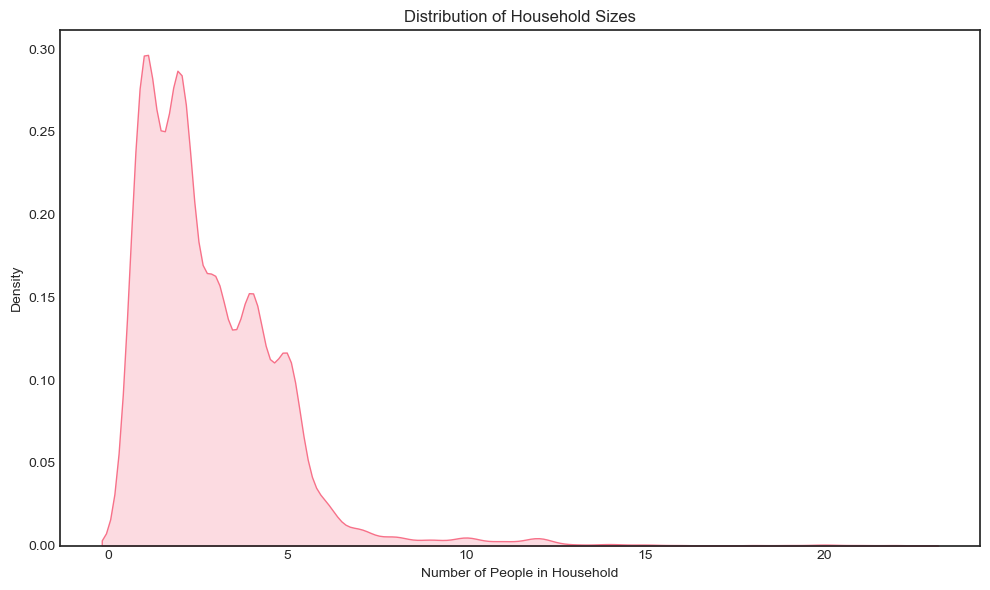

In [25]:
plt.figure(figsize=(10, 6))

# Group the data by House Number and Street to get the household sizes
household_sizes = data_copy.groupby(['House Number', 'Street']).size()

# Generate the KDE plot
sns.kdeplot(data=household_sizes, fill=True)

# Title and labels for the plot
plt.title('Distribution of Household Sizes')
plt.xlabel('Number of People in Household')
plt.ylabel('Density')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


## IMMIGRATION AND EMMIGRATION RATE

### Immigration and Emigration Estimates

- **Estimated Immigrants (Lodgers + Visitors)**: 468
  - This is calculated by filtering the dataset for individuals whose relationship to the head of the house is marked as "Lodger" or "Visitor".

- **Estimated Emigrants (Divorcees)**: 1033
  - This estimate is based on the number of people who have a marital status of "Divorced".

- **Immigration Rate per 1,000 People**: 47.91
  - The immigration rate is calculated by dividing the estimated number of immigrants by the total town population and multiplying by 1,000.

- **Emigration Rate per 1,000 People**: 105.74
  - The emigration rate is calculated by dividing the estimated number of emigrants by the total town population and multiplying by 1,000.


In [26]:
# Step 1: Total town population
total_town_population = len(data_copy)

# Step 2: Immigration estimate (based on lodgers and visitors)
estimated_immigrants = data_copy[data_copy['Relationship to Head of House'].isin(['Lodger', 'Visitor'])].shape[0]

# Step 3: Emigration estimate (based on divorcees)
estimated_emigrants = data_copy[data_copy['Marital Status'] == 'Divorced'].shape[0]

# Step 4: Calculate immigration and emigration rates per 1,000 people
immigration_rate = (estimated_immigrants / total_town_population) * 1000 if total_town_population > 0 else 0
emigration_rate = (estimated_emigrants / total_town_population) * 1000 if total_town_population > 0 else 0

# Display the results
print(f"Estimated immigrants (Lodgers + Visitors): {estimated_immigrants}")
print(f"Estimated emigrants (Divorcees): {estimated_emigrants}")
print(f"Immigration rate per 1,000 people: {immigration_rate}")
print(f"Emigration rate per 1,000 people: {emigration_rate}")



Estimated immigrants (Lodgers + Visitors): 468
Estimated emigrants (Divorcees): 1033
Immigration rate per 1,000 people: 47.906643464018835
Emigration rate per 1,000 people: 105.74265533831507


## <center>ANALYSIS</center>

### question (ai) 
High-Density Housing:

Analyze population growth or household overcrowding
write a code for this

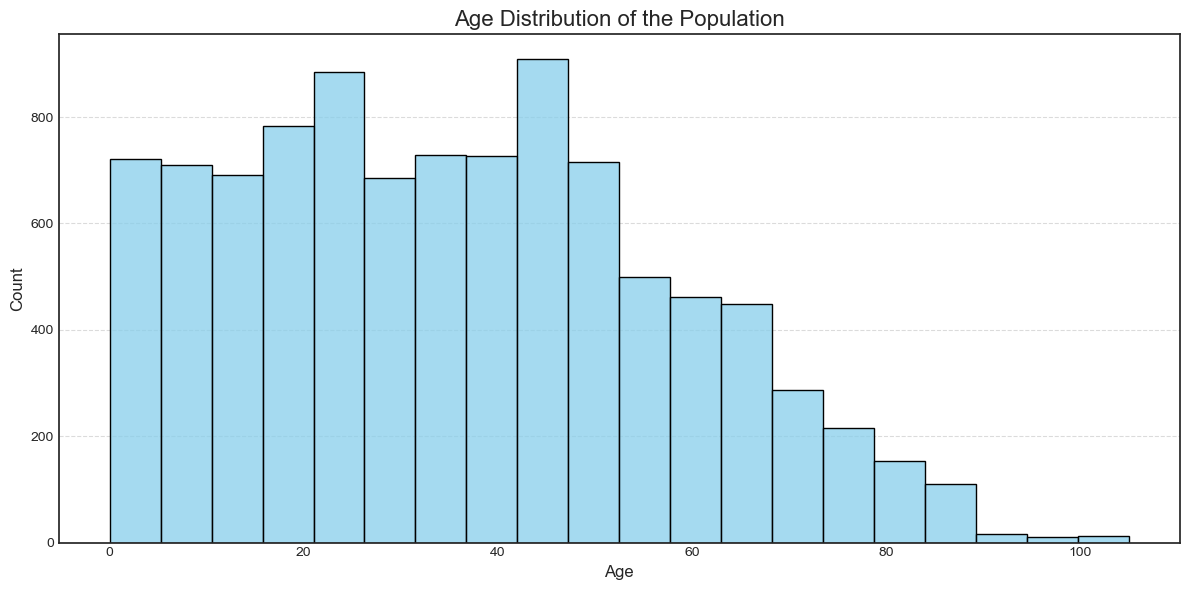

In [27]:
# Analyze age distribution to assess population growth trends
age_distribution = data_copy['Age'].value_counts().sort_index()

# Plot the age distribution (age pyramid)
plt.figure(figsize=(12, 6))
plot1 = sns.histplot(data_copy['Age'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Age Distribution of the Population', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300)  # Save the first plot
plt.show()

The histogram shows the age distribution of a population. The distribution is skewed to the right, indicating a larger proportion of younger individuals. The most frequent age group appears to be between 40 and 45 years old. The population size decreases with increasing age, particularly after 60 years old

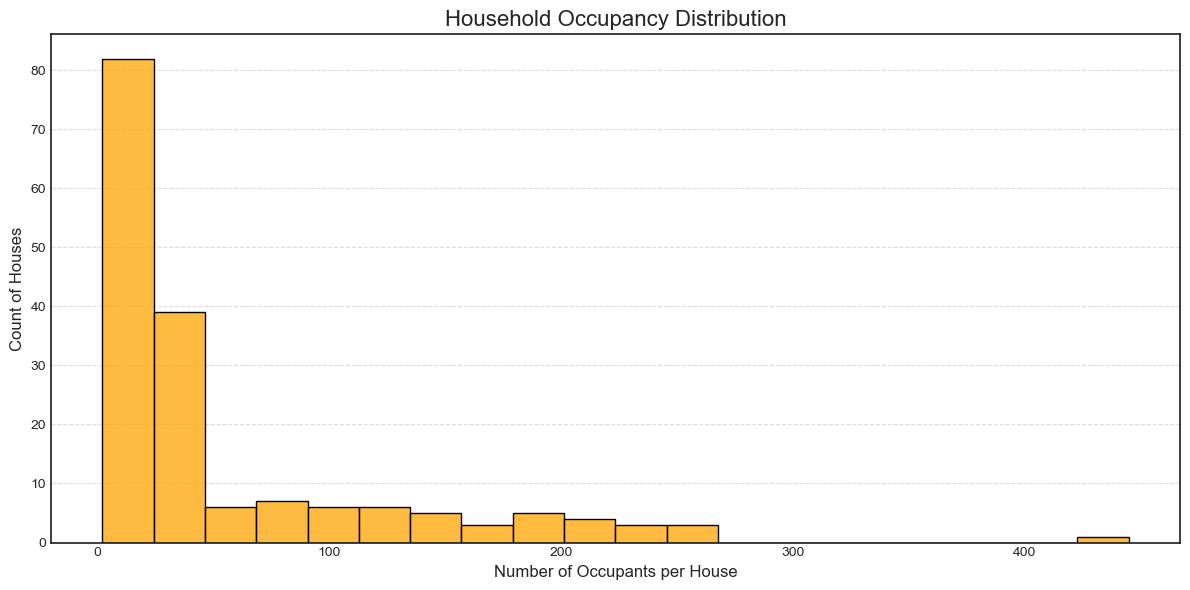

In [28]:
# Analyze household occupancy level (overcrowding)
household_occupancy = data_copy.groupby('House Number').size()

# Plot household occupancy distribution
plt.figure(figsize=(12, 6))
plot2 = sns.histplot(household_occupancy, bins=20, kde=False, color='orange', edgecolor='black')
plt.title('Household Occupancy Distribution', fontsize=16)
plt.xlabel('Number of Occupants per House', fontsize=12)
plt.ylabel('Count of Houses', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('household_occupancy_distribution.png', dpi=300)  # Save the second plot
plt.show();

The histogram displays the distribution of household occupancy. The majority of households have a low number of occupants, with the most frequent category being 0-50 occupants. The distribution is skewed to the right, indicating a larger proportion of households with fewer occupants.

In [29]:
# Summary statistics for household occupancy
household_occupancy.describe().to_frame()

,0
count,170.000000
mean,57.464706
std,69.893507
min,2.000000
25%,18.000000
50%,26.000000
75%,75.250000
max,445.000000


## question (aii)
Low-Density Housing:

Check for signs of affluence (occupations, household income proxies).
you should write just the code

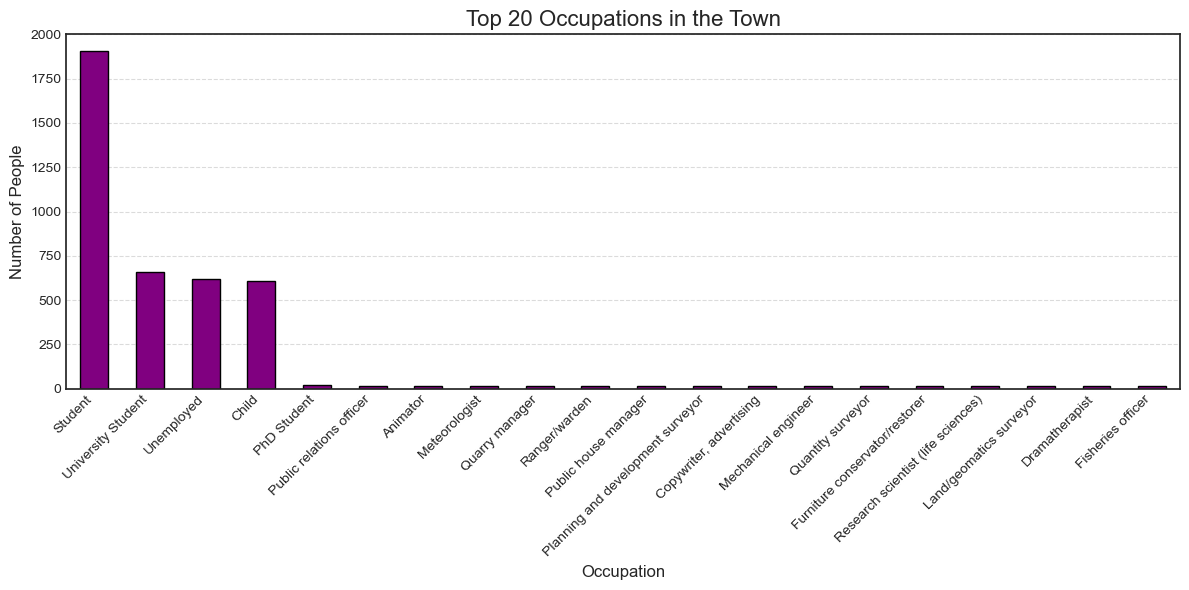

In [30]:
# Analyze occupations to check for signs of affluence
# Count the frequency of different occupations
occupation_counts =data_copy['Occupation'].value_counts()

# Plot the top 20 occupations to understand the employment distribution
plt.figure(figsize=(12, 6))
occupation_counts.head(20).plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 20 Occupations in the Town', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

The bar chart shows the top 20 occupations in the town. "Student" is the most common occupation, followed by "University Student" and "Unemployed." The remaining occupations are relatively rare, with each having fewer than 100 individuals.

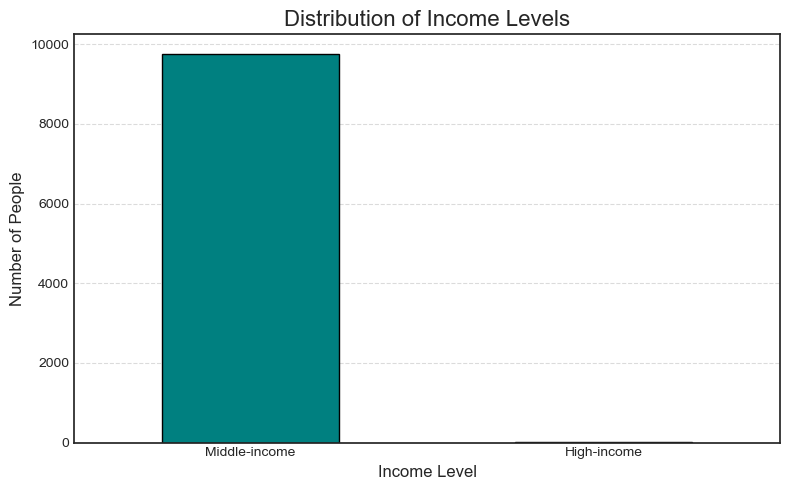

In [31]:
# Recreate the income level mapping based on occupations
income_mapping = {
    'Doctor': 'High-income',
    'Engineer': 'High-income',
    'Manager': 'High-income',
    'Lawyer': 'High-income',
    'Teacher': 'Middle-income',
    'Electrician': 'Middle-income',
    'Nurse': 'Middle-income',
    'Retail Assistant': 'Low-income',
    'Laborer': 'Low-income',
    'Cleaner': 'Low-income',
    # Add fallback for unmapped occupations (e.g., assuming "Other" or unknown cases as 'Middle-income')
}

# Assign income levels using the mapping
data_copy['Income Level'] = data_copy['Occupation'].map(income_mapping).fillna('Middle-income')

# Count occurrences of each income level
income_level_counts = data_copy['Income Level'].value_counts()

plt.figure(figsize=(8, 5))
income_level_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribution of Income Levels', fontsize=16)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

Average Occupants per Household: 2.8209644816632977
Median Occupants per Household: 2.0


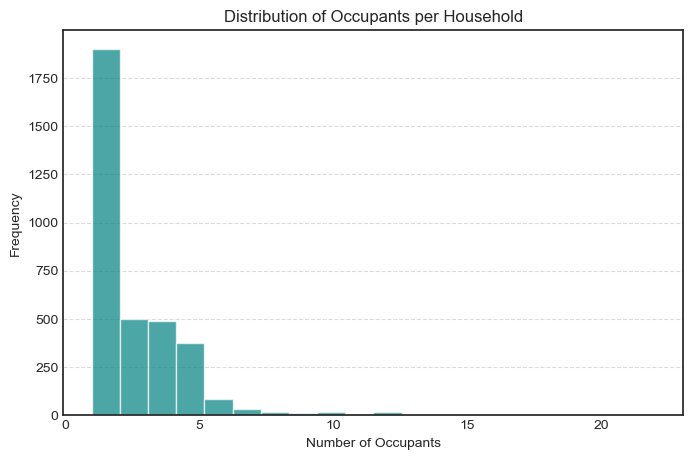

In [32]:
# Create a unique household identifier
data_copy['Household_ID'] = data_copy['House Number'].astype(str) + " " + data_copy['Street']

# Count occupants per household
occupants_per_household = data_copy.groupby('Household_ID').size()

# Summary statistics
avg_occupants = occupants_per_household.mean()
median_occupants = occupants_per_household.median()
print(f"Average Occupants per Household: {avg_occupants}")
print(f"Median Occupants per Household: {median_occupants}")

# Plot the distribution of occupants per household
plt.figure(figsize=(8, 5))
occupants_per_household.plot(kind='hist', bins=20, color='teal', alpha=0.7)
plt.title('Distribution of Occupants per Household')
plt.xlabel('Number of Occupants')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

Overall Age Distribution:
 Age Category
Adults      6291
Children    2411
Seniors     1067
Name: count, dtype: int64


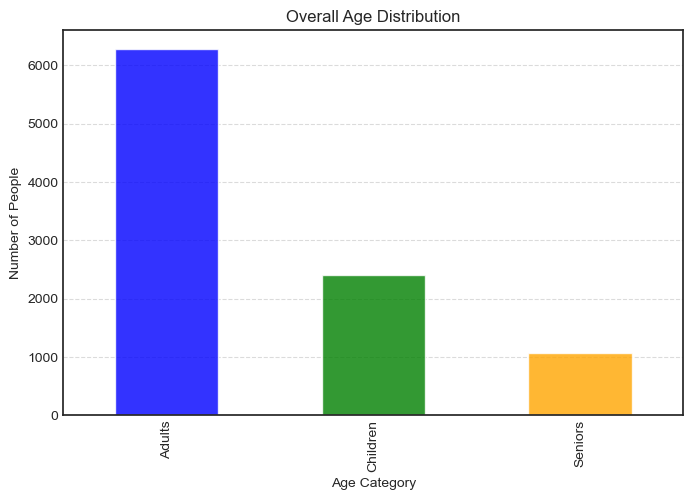

In [33]:
# Define age categories
def age_category(age):
    if age <= 17:
        return 'Children'
    elif 18 <= age <= 64:
        return 'Adults'
    else:
        return 'Seniors'

# Add an age category column
data_copy['Age Category'] = data_copy['Age'].apply(age_category)

# Group by Household ID and count each category
age_distribution = data_copy.groupby('Household_ID')['Age Category'].value_counts().unstack(fill_value=0)

# Summary of overall age distribution
overall_age_distribution = data_copy['Age Category'].value_counts()
print("Overall Age Distribution:\n", overall_age_distribution)

# Plot the overall age distribution
plt.figure(figsize=(8, 5))
overall_age_distribution.plot(kind='bar', color=['blue', 'green', 'orange'], alpha=0.8)
plt.title('Overall Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## question (aiii)
let move on to this Train Station:

Identify commuters from occupations and university student data.

                      Occupation Commuter Category
0  Retired Journalist, newspaper      Non-Commuter
1              Retired Paramedic      Non-Commuter
2                  Retail banker      Non-Commuter
3  Retired Adult guidance worker      Non-Commuter
4                      Paramedic      Non-Commuter
Commuter Category Counts:
 Commuter Category
Non-Commuter          6188
University Student    2584
Commuter               997
Name: count, dtype: int64


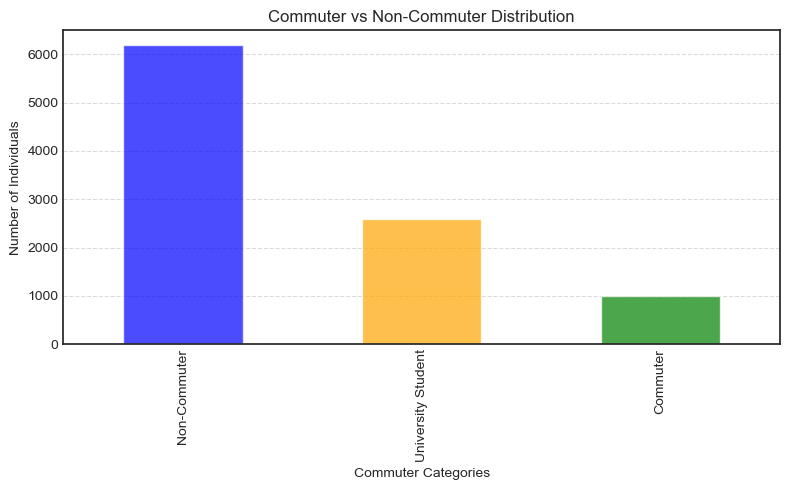

In [34]:
# Map occupations to 'commuter' category
def identify_commuter(occupation):
    # List of common commuting occupations
    commuter_occupations = ['teacher', 'nurse', 'driver', 'engineer', 'doctor', 'technician', 'admin']
    
    # Map occupation categories
    if pd.isna(occupation):
        return 'Non-Commuter'
    occupation_lower = occupation.lower()
    if any(commuter_occupation in occupation_lower for commuter_occupation in commuter_occupations):
        return 'Commuter'
    
    # Check for University student-related keywords
    if 'student' in occupation_lower or 'university' in occupation_lower:
        return 'University Student'
    
    return 'Non-Commuter'


# Apply the mapping to the 'Occupation' column
data_copy['Commuter Category'] = data_copy['Occupation'].apply(identify_commuter)

# Debugging to check mappings
print(data_copy[['Occupation', 'Commuter Category']].head())

# Count commuters and university students
commuter_counts = data_copy['Commuter Category'].value_counts()
print("Commuter Category Counts:\n", commuter_counts)

# Visualize the counts
plt.figure(figsize=(8, 5))
commuter_counts.plot(kind='bar', color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Commuter vs Non-Commuter Distribution')
plt.xlabel('Commuter Categories')
plt.ylabel('Number of Individuals')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot to a file
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('commuter_distribution.png', dpi=300)

# Show the plot
plt.show();

### Commuter Category Analysis

- **Commuter Category Counts**:
  - **Non-Commuter**: 6,188
    - This group includes individuals whose occupations do not fall into common commuter categories such as teachers, nurses, or engineers.
  - **University Student**: 2,584
    - This group includes individuals whose occupations contain keywords like "student" or "university", indicating they are university students.
  - **Commuter**: 997
    - This group includes individuals working in occupations typically associated with commuting, such as teachers, nurses, engineers, and drivers.

- A bar chart was generated to visualize the distribution of individuals across these commuter categories, with the following breakdown:
  - **Non-Commuter**: 6,188 individuals
  - **University Student**: 2,584 individuals
  - **Commuter**: 997 individuals

The plot showing the distribution is saved as `commuter_distribution.png`.


## question iv
Investigate religion distribution and demand for additional places of worship.

Religion Distribution:
 Religion
Christian        4439
No Religion      4143
Muslim            271
Hindu             182
Sikh              177
Catholic          144
Buddist           142
Not Specified     140
Other             131
Name: count, dtype: int64


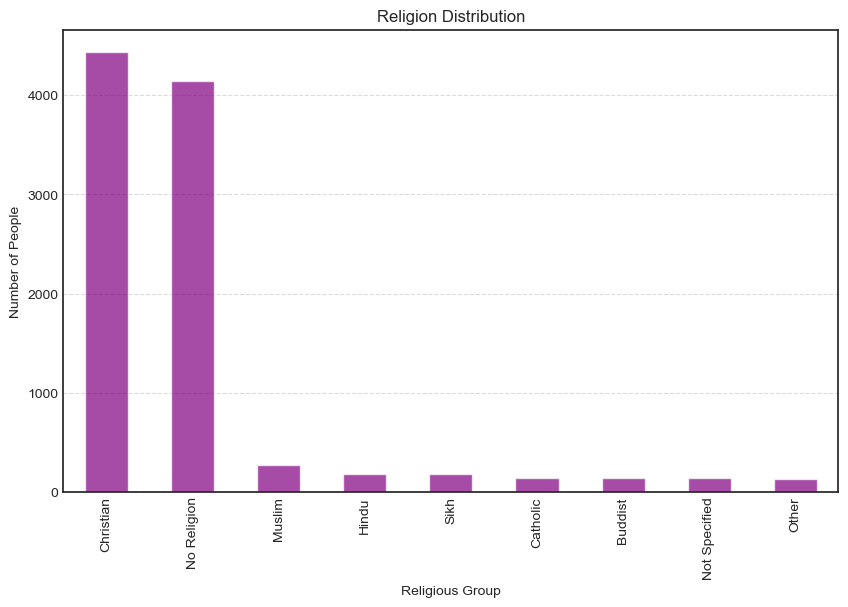

In [35]:
# Count the number of individuals in each religious group
religion_count = data_copy['Religion'].value_counts()  # Calculate the number of people in each religious group

# Display the religion count summary
print("Religion Distribution:\n", religion_count)  # Print the distribution of religious affiliations

# Plotting the distribution
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
religion_count.plot(kind='bar', color='purple', alpha=0.7)  # Create a bar plot with purple color and transparency
plt.title('Religion Distribution')  # Set the title of the plot
plt.xlabel('Religious Group')  # Label for the x-axis
plt.ylabel('Number of People')  # Label for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()  # Display the plot



Religion Distribution:
 Religion
Christian        4439
No Religion      4143
Muslim            271
Hindu             182
Sikh              177
Catholic          144
Buddist           142
Not Specified     140
Other             131
Name: count, dtype: int64

Number of Catholics: 144

Population in other religious groups:
 Religion
Christian        4439
No Religion      4143
Muslim            271
Hindu             182
Sikh              177
Buddist           142
Not Specified     140
Other             131
Name: count, dtype: int64


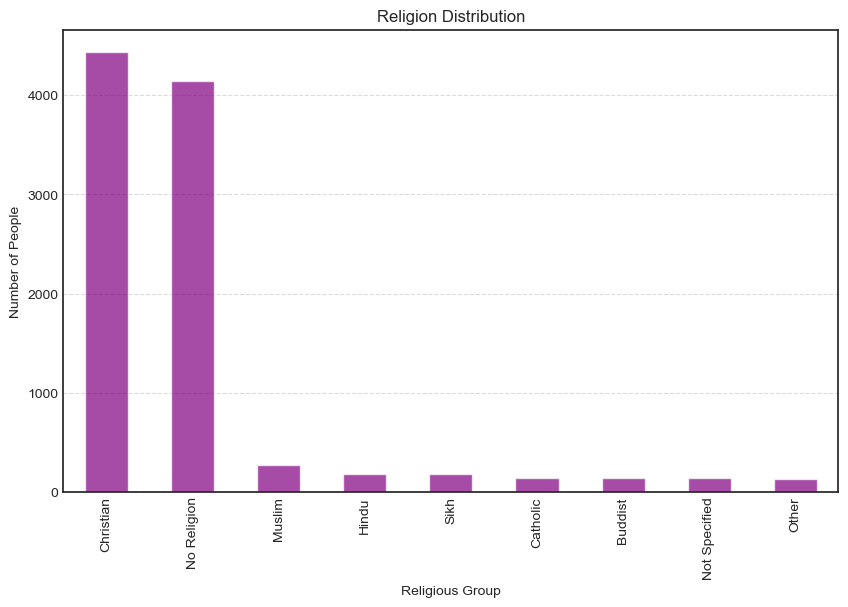


Demand insights (if other groups have a large population compared to half of Catholic numbers):
Religion
Christian        4439
No Religion      4143
Muslim            271
Hindu             182
Sikh              177
Buddist           142
Not Specified     140
Other             131
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [36]:
# Count the number of individuals in each religious group
religion_count = data_copy['Religion'].value_counts()

# Extract the number of Catholics
num_catholics = religion_count.get('Catholic', 0)

# Calculate other religious groups' population
other_religions = religion_count.drop('Catholic', errors='ignore')

# Summary to check demand for a second Church or other religious buildings
print("Religion Distribution:\n", religion_count)
print("\nNumber of Catholics:", num_catholics)
print("\nPopulation in other religious groups:\n", other_religions)

# Plotting to visualize demand
plt.figure(figsize=(10, 6))
plot1 ==religion_count.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Religion Distribution')
plt.xlabel('Religious Group')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Save the plot as an image file
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')


# Insights
# Evaluate if other denominations have a sufficient population density
threshold = num_catholics / 2  # Example threshold value 
demand_check = other_religions[other_religions > threshold]
print("\nDemand insights (if other groups have a large population compared to half of Catholic numbers):")
print(demand_check)


### Religion Distribution:
### Demand Insights:
- The demand for a second Church or other religious buildings can be analyzed by comparing the populations of other religious groups to half of the Catholic population.
- **Threshold**: Half of the Catholic population is **70**.
- All other groups have populations larger than this threshold, suggesting a demand for religious spaces to serve the Christian, No Religion, Muslim, Hindu, and other religious groups.


## question a(v)
Emergency medical building. Not a full hospital, but a minor injuries centre. This should be 
built if there are many injuries or future pregnancies likely in the population.

Number of reported injuries: 0
Number of women in childbearing age (15-45 years): 2525


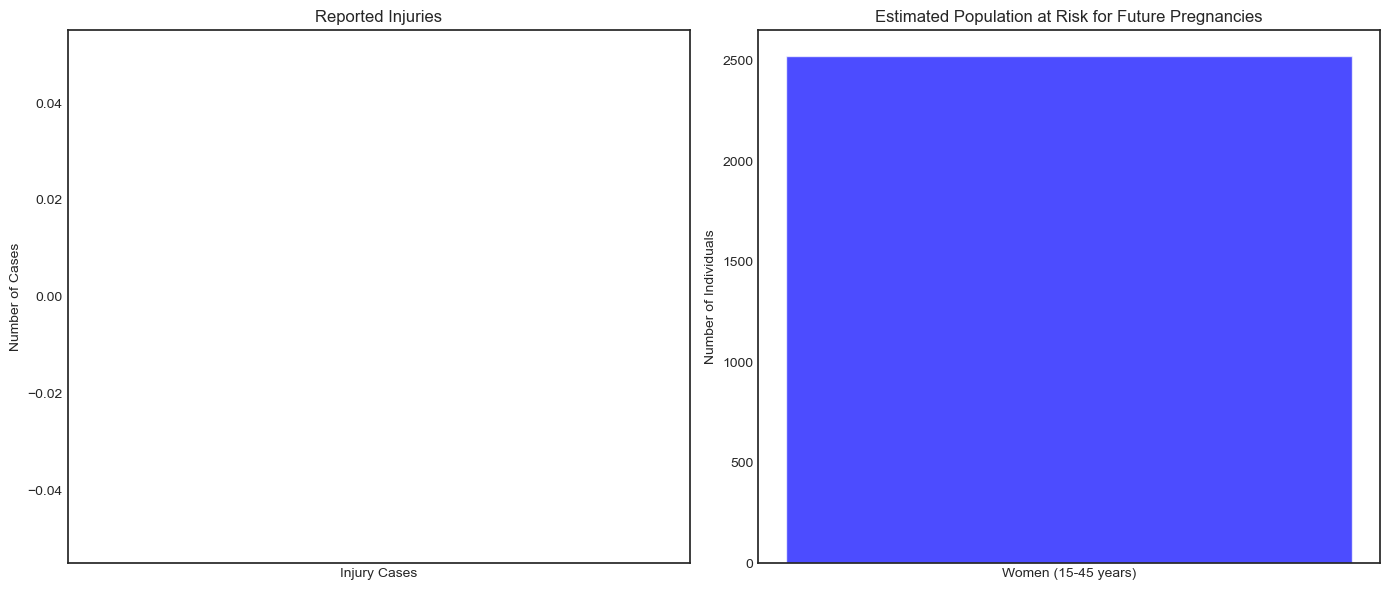

Recommendation: Build a minor injuries center based on population demand.


In [37]:

# Filter data to focus on injury counts from the "infirmity" column
# Count how many individuals report a type of injury or illness
injury_counts = data_copy['Infirmity'].value_counts()

# Identify relevant entries for 'injury' counts
# Assuming 'injury' refers to certain categories like "Injury" or similar terms in the column
injury_counts_filtered = injury_counts.get('Injury', 0)  # Adjust based on actual values

# Estimate future pregnancies by focusing on women aged between 15 and 45
# Filter data by gender and age to calculate the number of women of childbearing age
women_of_childbearing_age = data_copy[
    (data_copy['Gender'] == 'Female') & (data_copy['Age'] >= 15) & (data_copy['Age'] <= 45)
]

# Calculate the number of women in this age range
num_women_in_childbearing_age = women_of_childbearing_age['Age'].count()

# Display summary statistics
print("Number of reported injuries:", injury_counts_filtered)
print("Number of women in childbearing age (15-45 years):", num_women_in_childbearing_age)

# Plotting the data for visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for number of reported injuries
ax[0].bar(['Injury Cases'], [injury_counts_filtered], color='red', alpha=0.7)
ax[0].set_ylabel('Number of Cases')
ax[0].set_title('Reported Injuries')

# Bar chart for number of women in childbearing age
ax[1].bar(['Women (15-45 years)'], [num_women_in_childbearing_age], color='blue', alpha=0.7)
ax[1].set_ylabel('Number of Individuals')
ax[1].set_title('Estimated Population at Risk for Future Pregnancies')

plt.tight_layout()
plt.show()

# Decision insight based on numbers
if injury_counts_filtered > 50 or num_women_in_childbearing_age > 100:
    print("Recommendation: Build a minor injuries center based on population demand.")
else:
    print("Recommendation: No immediate need for a minor injuries center.")


### Injury and Pregnancy Risk Analysis

#### 1. **Reported Injuries:**
   - **Number of reported injuries**: 0

   Based on the data from the "Infirmity" column, no injuries have been reported under the 'Injury' category. This suggests that injury-related cases may not be prevalent in the population or that the injury category might require further validation to ensure proper categorization.

#### 2. **Women in Childbearing Age (15-45 years):**
   - **Number of women in childbearing age (15-45 years)**: 2525

   The analysis identified **2525 women** who fall within the childbearing age range of 15 to 45 years. This represents a significant portion of the population that may be at risk for future pregnancies, suggesting potential demand for healthcare services or family planning resources tailored to this group.

#### 3. **Recommendation:**
   Based on the insights from both the injury and pregnancy risk analyses:
   - Since there have been no reported injuries in the dataset, there seems to be no immediate need to build a minor injuries center.
   - However, with a large number of women in childbearing age, there may be a growing need for maternity or family planning services to support this demographic.

   **Final Decision**: **No immediate need for a minor injuries center** at this time, but monitoring population dynamics and healthcare needs for the women of childbearing age is recommended.


## UNEMPLOYMENT TREND
Employment and training. If there is evidence for a significant amount of unemployment, we 
should re-train people for new skills. 

Age distribution:
 Age Category
Working-age adults      6291
School-aged children    2411
Retired                 1067
Name: count, dtype: int64


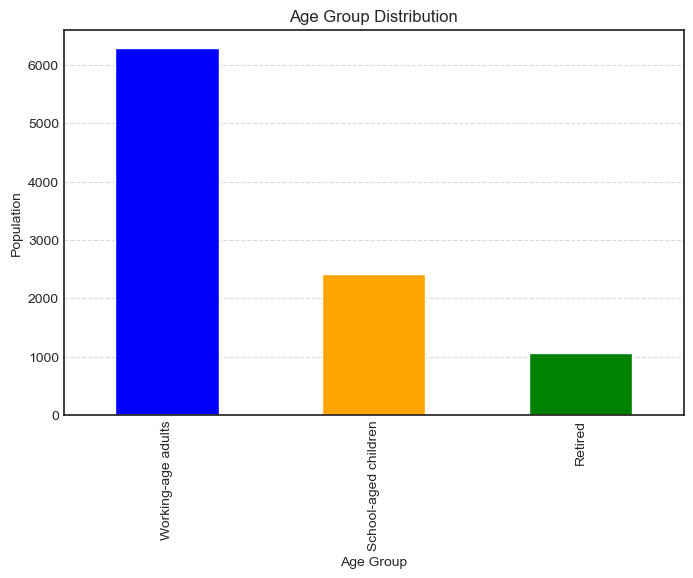

In [38]:
# (1) Age Pyramid Analysis - Determine age trends
# Categorize age into groups
def age_category(age):
    if age <= 17:
        return 'School-aged children'
    elif 18 <= age <= 64:
        return 'Working-age adults'
    else:
        return 'Retired'

data_copy['Age Category'] = data_copy['Age'].apply(age_category)

# Group counts by age categories
age_distribution = data_copy['Age Category'].value_counts()
print("Age distribution:\n", age_distribution)

# Plot the age distribution
plt.figure(figsize=(8, 5))
age_distribution.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

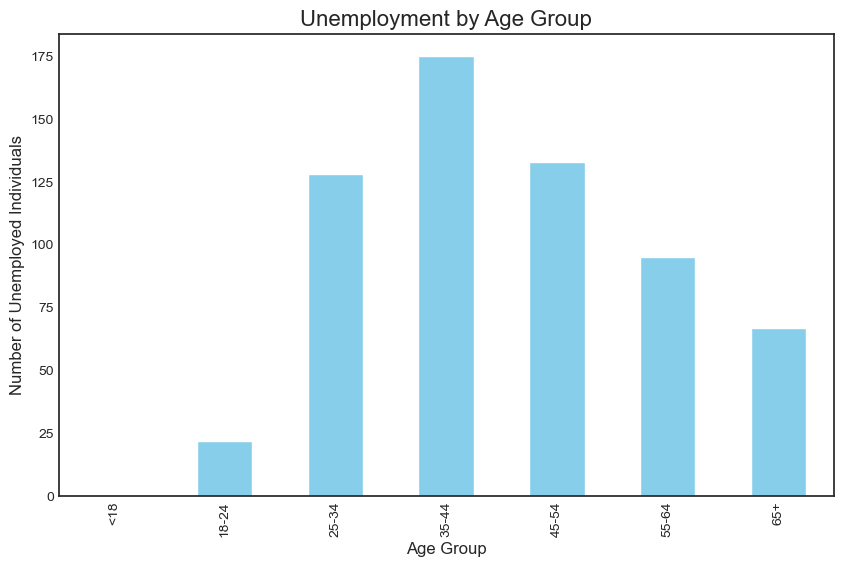

Unemployment by age group:
 Age_Group
<18        0
18-24     22
25-34    128
35-44    175
45-54    133
55-64     95
65+       67
Name: count, dtype: int64


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the bins (age ranges)
bins = [0, 17, 24, 34, 44, 54, 64, 100]  # Add more ranges as needed
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Age group labels

# Create the 'Age_Group' column based on 'Age'
data_copy['Age_Group'] = pd.cut(data_copy['Age'], bins=bins, labels=labels, right=False)

# Filter unemployment data again based on age groups
unemployment_by_age_group = data_copy[data_copy['Occupation'] == 'Unemployed']['Age_Group'].value_counts().sort_index()

# Plot the unemployment by age group
plt.figure(figsize=(10, 6))
unemployment_by_age_group.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Unemployment by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Unemployed Individuals', fontsize=12)

# Save the plot as an image file
plt.savefig('unemployment_by_age_group.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print unemployment by age group
print("Unemployment by age group:\n", unemployment_by_age_group)



##  Increase spending for schooling. If there is evidence of a growing population of school-aged children (new births, or families moving into the town), then the schooling spend should increase. 

In [40]:
# Define age range for children (0-4)
children_age_min, children_age_max = 0, 4

# Count the number of children aged 0-4
children_population = data_copy[data_copy['Age'].between(children_age_min, children_age_max)].shape[0]

# Total population
total_population = len(data_copy)

# Estimate the birth rate (children as a proportion of the total population)
birth_rate = children_population / total_population

# Project the school-aged population (age 5-18) for the future
school_age_min, school_age_max = 5, 18
current_school_population = data_copy[data_copy['Age'].between(school_age_min, school_age_max)].shape[0]

# Project future school-aged population assuming the same birth rate over the next 10 years
future_school_population = current_school_population + int(total_population * birth_rate * 10)  # Project for 10 years

# Output the results
print(f"Current school-aged population: {current_school_population}")
print(f"Projected school-aged population in 10 years: {future_school_population}")


Current school-aged population: 1947
Projected school-aged population in 10 years: 8027


## BIRTH RATE AND DEATH RATE

In [41]:
# (5) Birth Rate Insights
# Assuming birth rates can be derived from age data (ages of mothers in childbearing years)
childbearing_women = data_copy[(data_copy['Age'] >= 15) & (data_copy['Age'] <= 45)]
birth_rate_estimate = len(childbearing_women)  # Proxy based on counts in this range
print("Estimated women of childbearing age:", birth_rate_estimate)


Estimated women of childbearing age: 4553


In [42]:
#death rate
# Step 1: Filter for the age groups 56-60 and 61-65
age_group_56_60 = data_copy[(data_copy['Age'] >= 56) & (data_copy['Age'] <= 60)]
age_group_61_65 = data_copy[(data_copy['Age'] >= 61) & (data_copy['Age'] <= 65)]

# Step 2: Total number of people in each age group
total_population_56_60 = len(age_group_56_60)
total_population_61_65 = len(age_group_61_65)

# Step 3: Estimate total deaths in the last 5 years
estimated_deaths_last_5_years = max(0, total_population_56_60 - total_population_61_65)

# Step 4: Annualize the deaths
annual_deaths_56_60 = estimated_deaths_last_5_years / 5

# Step 5: Calculate the death rate per 100,000 people in the town
total_town_population = len(data_copy)
death_rate_56_60_per_100k = (annual_deaths_56_60 / total_town_population) * 100000 #if total_town_population > 0 else 0

# Display the results
print(f"Total population (56-60): {total_population_56_60}")
print(f"Total population (61-65): {total_population_61_65}")
print(f"Estimated deaths in the last 5 years: {estimated_deaths_last_5_years}")
print(f"Annualized deaths (56-60): {annual_deaths_56_60}")
print(f"Death rate (56-60) per 100,000 people: {death_rate_56_60_per_100k}")

Total population (56-60): 470
Total population (61-65): 422
Estimated deaths in the last 5 years: 48
Annualized deaths (56-60): 9.6
Death rate (56-60) per 100,000 people: 98.27003787491043
